## [Correlation_Regression]
<br/>

- Îëê Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú
    - Í≥µÎ∂ÑÏÇ∞
    - ÏÉÅÍ¥ÄÍ≥ÑÏàò
    <br/><br/>

- ÏÉÅÍ¥ÄÎ∂ÑÏÑù
    - One way ANOVA
    <br/><br/>
    
- ÌöåÍ∑ÄÎ∂ÑÏÑù
    - One way ANOVA
    <br/><br/>
    

- ###  Í≥µÎ∂ÑÏÇ∞
    - Í≥µÎ∂ÑÏÇ∞(covariance) : 2Í∞úÏùò ÌôïÎ•†Î≥ÄÏàòÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Í∞í
    - Í≥µÎ∂ÑÏÇ∞ÏùÑ ÏâΩÍ≤å Ïù¥Ìï¥ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Î∂ÄÌò∏Î•º Î∂ôÏù∏ Î©¥Ï†ÅÏùÑ ÏÉùÍ∞ÅÌïòÎ©¥ Îê®
    - ÏßÅÏÇ¨Í∞ÅÌòï &rarr; Í∞ÄÎ°úÍ∏∏Ïù¥ : ÏòÅÏñ¥ Ï†êÏàòÏùò Ìé∏Ï∞® / ÏÑ∏Î°úÍ∏∏Ïù¥ : ÏàòÌïô Ï†êÏàòÏùò Ìé∏Ï∞®
    - CÌïôÏÉùÏùÄ ÏàòÌïô Ï†êÏàò Ìé∏Ï∞®Í∞Ä ÏùåÏùò Í∞íÏù¥Í≥†, ÏòÅÏñ¥ Ï†êÏàò Ìé∏Ï∞®Í∞Ä ÏñëÏùò Í∞íÏù¥ÎØÄÎ°ú Í≥µÎ∂ÑÏÇ∞(ÏßÅÏÇ¨Í∞ÅÌòïÏùò Î©¥Ï†Å)ÏùÄ ÏùåÏùò Í∞í
    <br/>
    
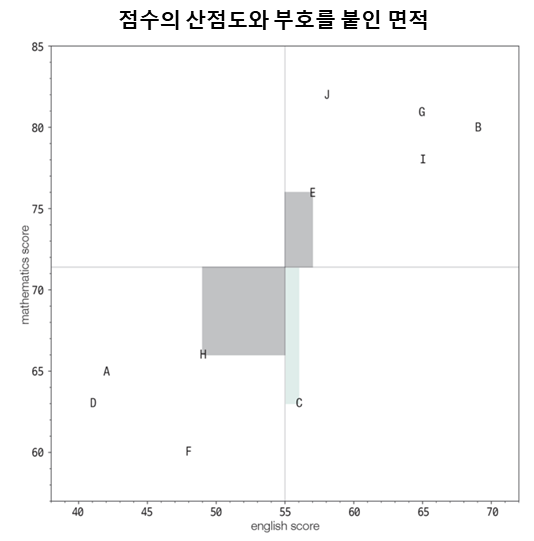
<br/>


In [2]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

english  mathematics
student                      
A             42           65
B             69           80
C             56           63
D             41           63
E             57           76
F             48           60
G             65           81
H             49           66
I             65           78
J             58           82

In [4]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

english  mathematics  english_deviation  mathematics_deviation  \
student                                                                   
A             42           65              -13.0                   -6.4   
B             69           80               14.0                    8.6   
C             56           63                1.0                   -8.4   
D             41           63              -14.0                   -8.4   
E             57           76                2.0                    4.6   
F             48           60               -7.0                  -11.4   
G             65           81               10.0                    9.6   
H             49           66               -6.0                   -5.4   
I             65           78               10.0                    6.6   
J             58           82                3.0                   10.6   

         product of deviations  
student                         
A                         83.2  
B                        120.4  
C                         -8.4  
D                        117.6  
E                          9.2  
F                         79.8  
G                         96.0  
H                         32.4  
I                         66.0  
J                         31.8

In [5]:
summary_df['product of deviations'].mean()

62.8

In [6]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [7]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [8]:
cov_mat[0, 0], cov_mat[1, 1]

(86.0, 68.44000000000001)

In [9]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

- ### ÏÉÅÍ¥ÄÍ≥ÑÏàò
    - ÏÉÅÍ¥ÄÍ≥ÑÏàò(correlation coefficient) : Îã®ÏúÑÏóê ÏùòÏ°¥ÌïòÏßÄ ÏïäÎäî ÏÉÅÍ¥ÄÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú
    - ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÏàòÏãùÏúºÎ°ú ÌëúÌòÑÌï† Ïàò ÏûàÏùå
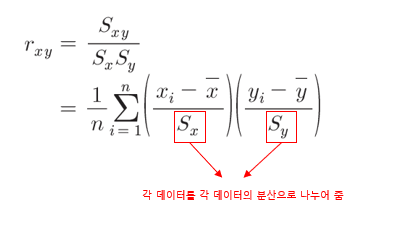
    
    - ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî ùëü_ùë•ùë¶  ÎòêÎäî ùëüÎ°ú ÌëúÌòÑÌï† Ïàò ÏûàÏùå
    - ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Î∞òÎìúÏãú -1Í≥º 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßê
    - ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÎÜìÏó¨ ÏûàÏùÑÏàòÎ°ù 1Ïóê Í∞ÄÍπåÏõåÏßÄÍ≥†, ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÎÜìÏó¨ ÏûàÏùÑÏàòÎ°ù -1Ïóê Í∞ÄÍπåÏõåÏßê (Î¨¥ÏÉÅÍ¥ÄÏùº Í≤ΩÏö∞ 0)
    - ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä -1 ÎòêÎäî 1Ïù∏ Í≤ΩÏö∞Îäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏôÑÏ†ÑÌûà ÏßÅÏÑ†ÏÉÅÏóê ÎÜìÏù¥Í≤å Îê®
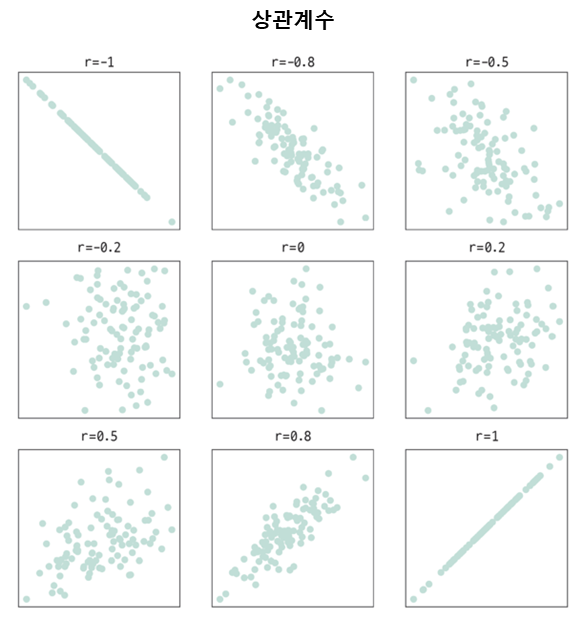

In [10]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Íµ¨ÌïòÎäî Î∞©Î≤ï (1)

np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [12]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Íµ¨ÌïòÎäî Î∞©Î≤ï (2)

np.corrcoef(en_scores, ma_scores)   # ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî ÎåÄÍ∞ÅÏÑ†(/) Í∞í

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [13]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Íµ¨ÌïòÎäî Î∞©Î≤ï (3)

scores_df.corr()

english  mathematics
english      1.000000     0.818569
mathematics  0.818569     1.000000

- ### ÏÉÅÍ¥ÄÎ∂ÑÏÑù
    - Ïïû Ïä¨ÎùºÏù¥ÎìúÏóêÏÑú Î∞∞Ïö¥ Í≤ÉÏ≤òÎüº ÏÉÅÍ¥ÄÎ∂ÑÏÑùÎèÑ Î™®ÏàòÏ†Å Î∞©Î≤ïÍ≥º ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ïÏúºÎ°ú ÎÇòÎàÑÏñ¥ Ïßê
    - PearsonÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùÄ ÎåÄÌëúÏ†ÅÏù∏ Î™®ÏàòÏ†Å ÏÉÅÍ¥ÄÎ∂ÑÏÑùÎ≤ïÏúºÎ°ú Îëê Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ï§ë ÏµúÏÜå ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÏÑ±ÏùÑ Í∞ñÎäîÎã§Í≥† Í∞ÄÏ†ïÌï®
    - Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî PearsonÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏßÑÌñâÌï† Í≤É
    - ÌëúÎ≥∏Ïùò ÏàòÍ∞Ä 30 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨Ïóê ÏùòÌï¥ Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï ÏóÜÏù¥ÎèÑ Î™®ÏàòÏ†Å ÏÉÅÍ¥ÄÎ∂ÑÏÑùÎ≤ïÏùÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÏùå
    - ÏïÑÎûò Í∑∏Î¶ºÏùÄ Îëê Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞ Í∞ÅÍ∞ÅÏùò ÏÑ±Í≤©Ïóê Îî∞Îùº Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî ÏÉÅÍ¥ÄÎ∂ÑÏÑùÎ≤ïÏùÑ Ï†ïÎ¶¨Ìïú ÌëúÏûÑ
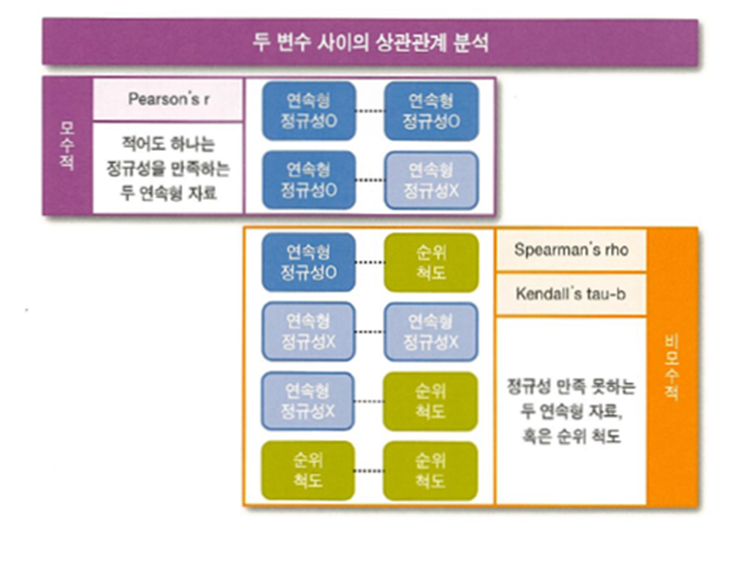

    - Í≤∞Ï†ïÍ≥ÑÏàò $r^2$ : ÏÉÅÍ¥ÄÍ≥ÑÏàò(ùëü)Ïùò Ï†úÍ≥±ÏúºÎ°ú ÌëúÌòÑÎêòÎ©∞ Îëê Î≥ÄÏàò ÏÇ¨Ïù¥Ïùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÏùò Ï†ïÎèÑÎ•º ÏÑ§Î™Ö
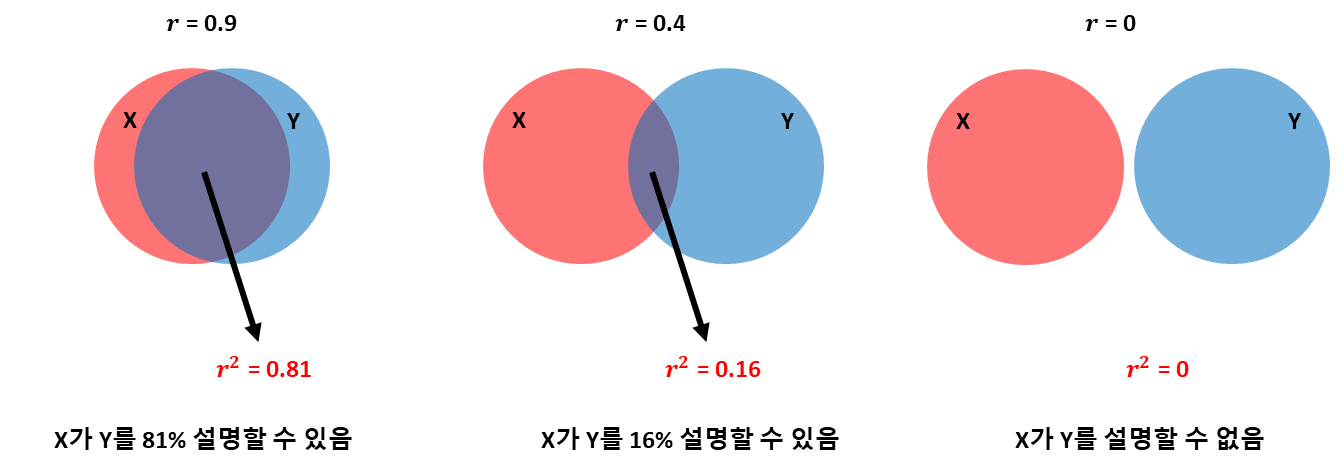

    - Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) : Îëê Î≥ÄÏàòÎäî ÏÑ†ÌòïÏùò Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÏùå(r=0)
    - ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1) : Îëê Î≥ÄÏàòÎäî ÏÑ†ÌòïÏùò Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏùå(r=/0)

In [19]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('./data/6_correlation_and_regression.csv')
df.head()

age  height  weight  waistline   BMI  SBP
0   57   164.0    62.0       85.0  23.1  147
1   25   172.0    54.0       65.0  18.3  116
2   57   157.0    59.0       83.0  23.9  122
3   43   170.0    87.8      104.0  30.4  130
4   52   155.0    50.0       83.0  20.8  120

In [20]:
df.shape

(322, 6)

In [24]:
# ÎÇòÏù¥ÏôÄ ÌóàÎ¶¨ÎëòÎ†àÏóê ÎåÄÌï¥ Pearson ÏÉÅÍ¥ÄÎ∂ÑÏÑù -> Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏóÜÏùå)

age_waistline_coef, age_waistline_p = stats.pearsonr(df['age'], df['waistline'])
age_waistline_det = age_waistline_coef ** 2   # Í≤∞Ï†ïÍ≥ÑÏàò r^2

print(age_waistline_coef, age_waistline_p, age_waistline_det)

0.050031455664457866 0.3708664802694068 0.002503146555904613


In [25]:
# ÌóàÎ¶¨ÎëòÎ†àÏôÄ BMIÏóê ÎåÄÌï¥ Pearson ÏÉÅÍ¥ÄÎ∂ÑÏÑù -> ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏûàÏùå)

waistline_BMI_coef, waistline_BMI_p = stats.pearsonr(df['waistline'], df['BMI'])
waistline_BMI_det = waistline_BMI_coef ** 2   # Í≤∞Ï†ïÍ≥ÑÏàò r^2

print(waistline_BMI_coef, waistline_BMI_p, waistline_BMI_det)

0.8006600304146125 3.540002961020688e-73 0.6410564843035282


- ### ÌöåÍ∑ÄÎ∂ÑÏÑù(regression analysis)
    - ÌöåÍ∑ÄÎ∂ÑÏÑù(regression analysis) : Ïù∏Í≥ºÍ¥ÄÍ≥ÑÍ∞Ä ÏùòÏã¨ÎêòÎäî Î≥µÏàòÏùò Î≥ÄÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïñ¥Îäê Î≥ÄÏàòÎ°úÎ∂ÄÌÑ∞ Îã§Î•∏ Î≥ÄÏàòÏùò Í∞íÏùÑ ÏòàÏ∏°ÌïòÎäî Í∏∞Î≤ï
    - ÏÑ§Î™ÖÎ≥ÄÏàò(explanatory variable) : ÏõêÏù∏Ïù¥ ÎêòÎäî Î≥ÄÏàò, Î∞òÏùëÎ≥ÄÏàòÎ•º ÏòàÏ∏°ÌïòÎäîÎç∞ ÏÇ¨Ïö©ÎêòÎäî Î≥ÄÏàò( = ÎèÖÎ¶ΩÎ≥ÄÏàò independent variable)
    - Î∞òÏùëÎ≥ÄÏàò(response variable) : Í≤∞Í≥ºÍ∞Ä ÎêòÎäî Î≥ÄÏàò, ÏòàÏ∏°ÎêòÎäî Î≥ÄÏàò( = Ï¢ÖÏÜçÎ≥ÄÏàò dependent variable)
    - Îã®ÏàúÌöåÍ∑ÄÎ™®Ìòï(simple regression model) : ÏÑ§Î™ÖÎ≥ÄÏàòÏôÄ Î∞òÏùëÎ≥ÄÏàòÍ∞Ä 1Í∞úÏî©Ïù∏ Í∞ÄÏû• Îã®ÏàúÌïú Î™®Îç∏
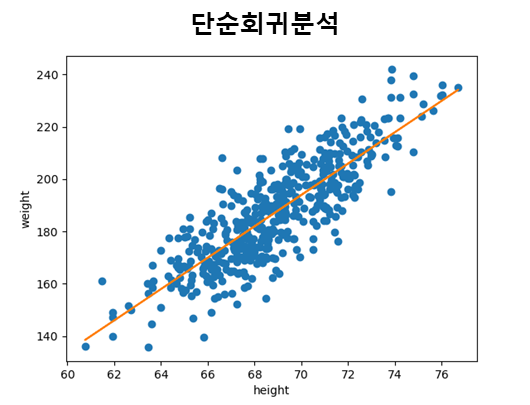

- #### ÏÇ∞Ï†êÎèÑÏôÄ ÌöåÍ∑ÄÎ∂ÑÏÑù
    - PearsonÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏóêÏÑú ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ 322Î™ÖÏùò ÌóàÎ¶¨ÎëòÎ†àÏôÄ BMIÎ°ú ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î¶¨Í≥† ÌöåÍ∑ÄÏßÅÏÑ†ÏùÑ Í∑∏Î†§Î≥º Í≤É

In [29]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('./data/6_correlation_and_regression.csv')
df.head()

age  height  weight  waistline   BMI  SBP
0   57   164.0    62.0       85.0  23.1  147
1   25   172.0    54.0       65.0  18.3  116
2   57   157.0    59.0       83.0  23.9  122
3   43   170.0    87.8      104.0  30.4  130
4   52   155.0    50.0       83.0  20.8  120

In [30]:
x = np.array(df['waistline'])
y = np.array(df['BMI'])

p = 1

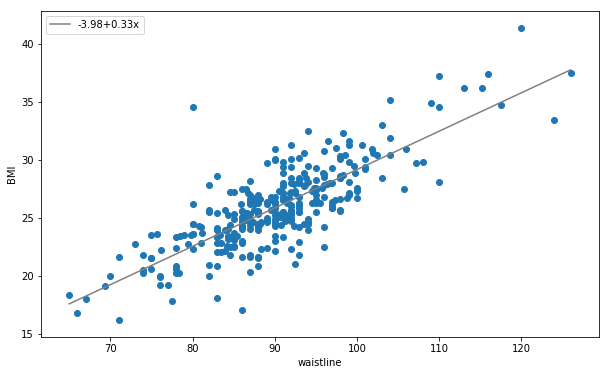

In [32]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('waistline')
ax.set_ylabel('BMI')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

- #### ÏÇ∞Ï†êÎèÑÏôÄ ÌöåÍ∑ÄÎ∂ÑÏÑù
    - statsmodel ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌöåÍ∑ÄÎ∂ÑÏÑù ÏßÑÌñâ

In [33]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv('./data/6_correlation_and_regression.csv')
df.head()

age  height  weight  waistline   BMI  SBP
0   57   164.0    62.0       85.0  23.1  147
1   25   172.0    54.0       65.0  18.3  116
2   57   157.0    59.0       83.0  23.9  122
3   43   170.0    87.8      104.0  30.4  130
4   52   155.0    50.0       83.0  20.8  120

In [34]:
formula = 'BMI ~ waistline'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     571.5
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           3.54e-73
Time:                        19:59:47   Log-Likelihood:                -707.76
No. Observations:                 322   AIC:                             1420.
Df Residuals:                     320   BIC:                             1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9761      1.255     -3.169      0.002      -6.445      -1.507
waistline      0.3313      0.014     23.906      0.000       0.304       0.359
==============================================================================
Omnibus:                       35.002   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.833
Skew:                           0.424   Prob(JB):                     5.20e-25
Kurtosis:                       5.760   Cond. No.                         933.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

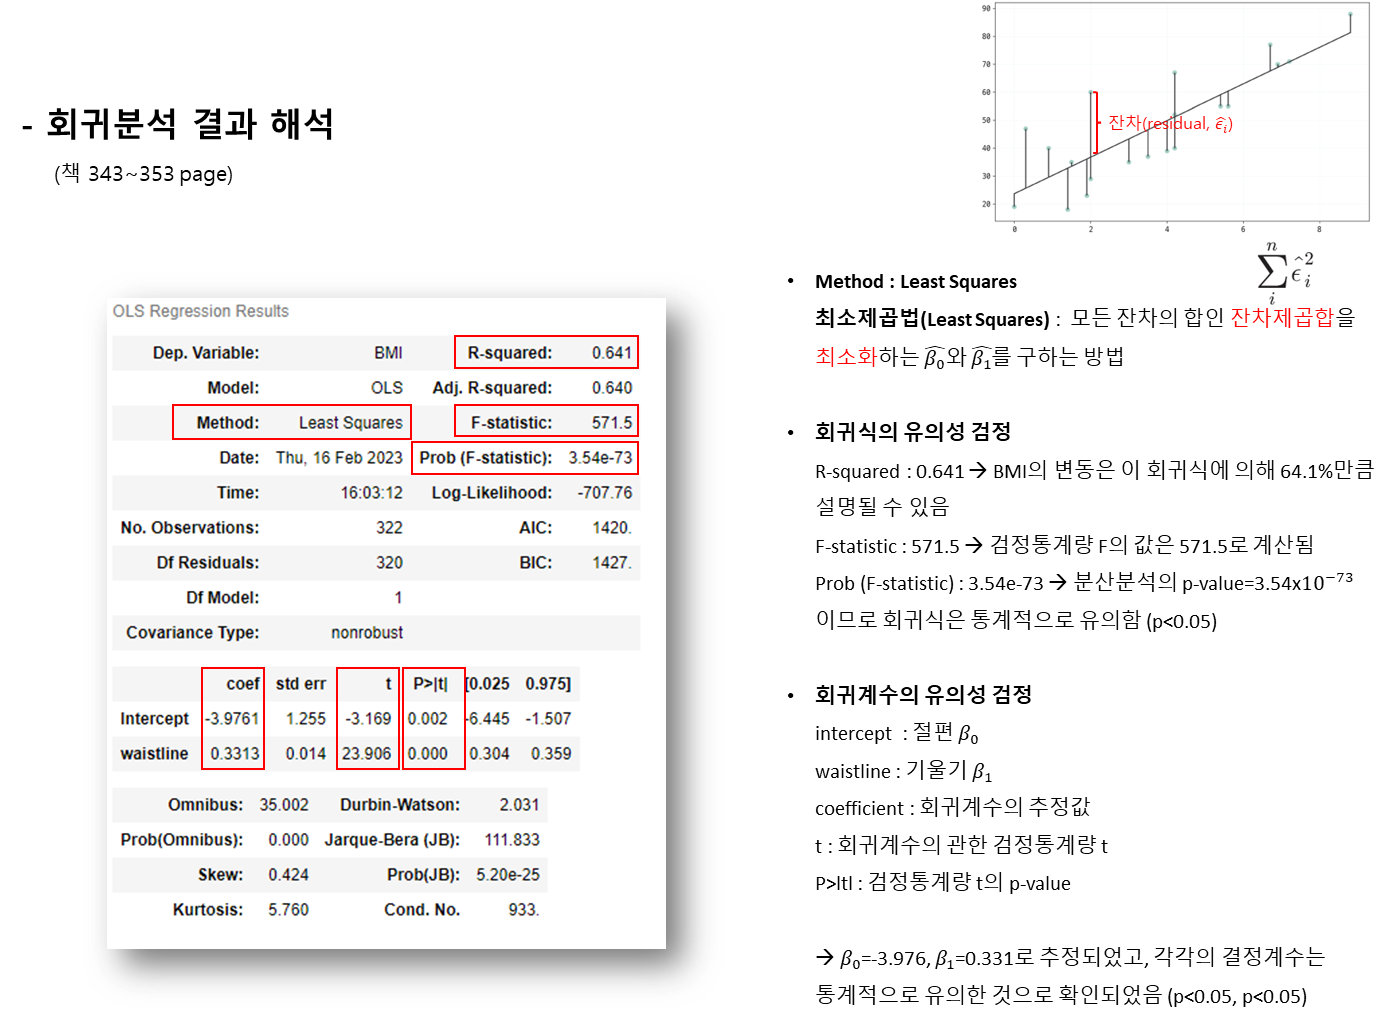